In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/Users/laszlofreund/miniconda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/laszlofreund/miniconda/lib/python3.10/site-packages/torchvision/image.so, 0x0006): symbol not found in flat namespace '__ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

transformer = Compose([
    ToTensor(),
    transforms.Normalize((0,), (1,))
])

# Load MNIST dataset
train_dataset = MNIST(root='./data', train=True, download=True, transform=transformer)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transformer)

# Create data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
train_loader.dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [4]:
# Create an instance of the model
model1 = Net().to(device)
model2 = Net().to(device)

In [5]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)


# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer1.zero_grad()
        optimizer2.zero_grad()

        outputs1 = model1(inputs)
        outputs2 = model2(inputs)
        loss1 = criterion(outputs1, labels)
        loss2 = criterion(outputs2, labels)
        loss1.backward()
        loss2.backward()
        optimizer1.step()
        optimizer2.step()

        loss = (loss1 + loss2) / 2

        running_loss += loss.item()
        if i % 100 == 99:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0

Epoch [1/10], Step [100/469], Loss: 1.8459
Epoch [1/10], Step [200/469], Loss: 1.6018
Epoch [1/10], Step [300/469], Loss: 1.5764
Epoch [1/10], Step [400/469], Loss: 1.5658
Epoch [2/10], Step [100/469], Loss: 1.5475
Epoch [2/10], Step [200/469], Loss: 1.5436
Epoch [2/10], Step [300/469], Loss: 1.5469
Epoch [2/10], Step [400/469], Loss: 1.5410
Epoch [3/10], Step [100/469], Loss: 1.5372
Epoch [3/10], Step [200/469], Loss: 1.5270
Epoch [3/10], Step [300/469], Loss: 1.5265
Epoch [3/10], Step [400/469], Loss: 1.5267
Epoch [4/10], Step [100/469], Loss: 1.5188
Epoch [4/10], Step [200/469], Loss: 1.5197
Epoch [4/10], Step [300/469], Loss: 1.5181
Epoch [4/10], Step [400/469], Loss: 1.5161
Epoch [5/10], Step [100/469], Loss: 1.5101
Epoch [5/10], Step [200/469], Loss: 1.5097
Epoch [5/10], Step [300/469], Loss: 1.5119
Epoch [5/10], Step [400/469], Loss: 1.5062
Epoch [6/10], Step [100/469], Loss: 1.5073
Epoch [6/10], Step [200/469], Loss: 1.5025
Epoch [6/10], Step [300/469], Loss: 1.5024
Epoch [6/10

In [31]:
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.13%


In [32]:
import mei
Mei = mei.MEI()
Mei.add_model(model1)
Mei.add_model(model2)

In [35]:
meip = Mei.generate([1])

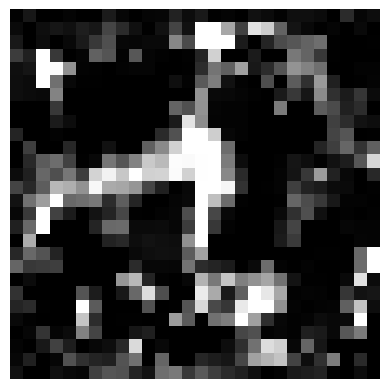

1.0


In [36]:
import matplotlib.pyplot as plt

plt.imshow(meip.mei, cmap='gray')
plt.axis('off')
plt.show()
print(meip.activation)

In [148]:
import importlib
importlib.reload(mei)

ImportError: cannot import name 'query' from 'utils' (/Users/laszlofreund/code/ai/mei/torch/mei/utils.py)

In [ ]:
from mei import MEI

mei = MEI(train_loader)##
mei.add_model(model1)##
mei.add_model(model2)##

mei.remove_model(model1)##
meis = mei.generate() ##itt sok sok paraméter
best_images = meis.find_best_images()
best_image_patches = meis.find_best_image_pathces()
spatial_frequency = meis.compute_spatial_frequency()
masked_meis = meis.mask()
gabor_stimuli = mei.gabor_stimuli()